# Persian Spotify Analysis
Alright, listen up folks! We're about to dive into some serious data analysis and machine learning. We'll start with some EDA to get to know the data, and then we'll use machine learning to extract some juicy insights. So, let's not waste any time and get this journey started!

<div align="center">
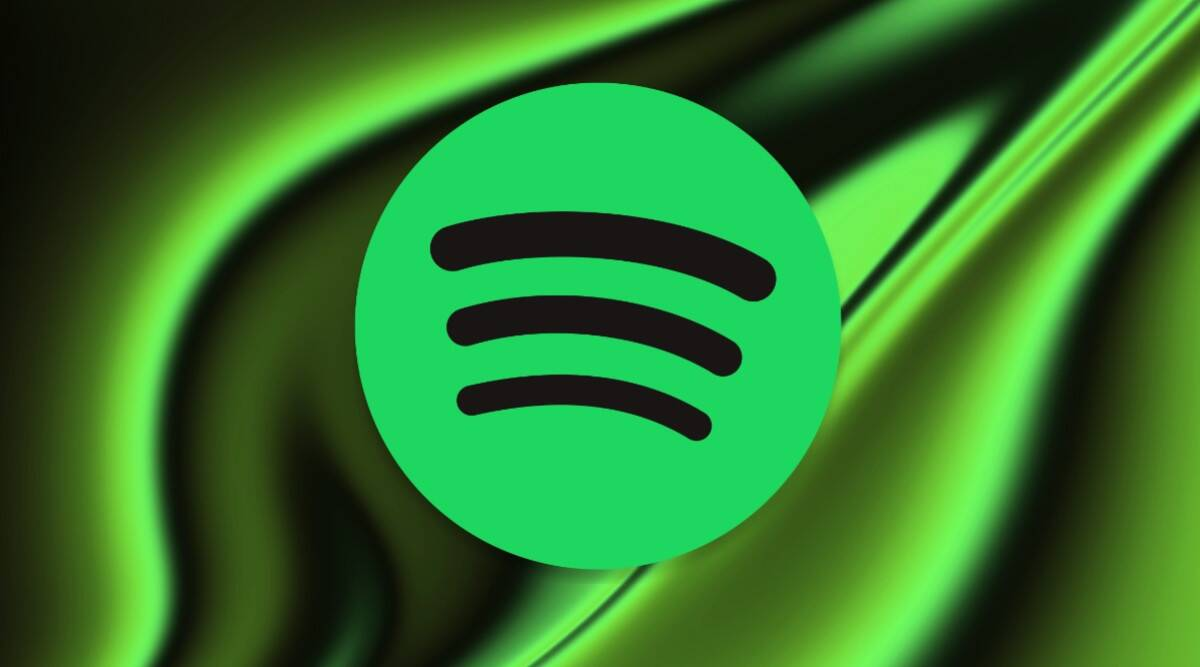
</div>

# Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix
)
from pprint import pprint 

In [2]:
%pwd

'd:\\Workspace\\github\\AUT-CE-DM\\project'

# Load Spotify Dataset (CSV file)

In [3]:
spotify_df = pd.read_csv("Spotfiy_Persian_Artists.csv")
spotify_df.describe()

,disc_number,duration_ms,popularity,track_number,album_total_tracks,album_release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,10632.000000,1.063200e+04,931.000000,10632.000000,931.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000
mean,1.069225,2.888011e+05,20.113856,5.576279,9.707841,1981.687453,0.510869,0.496408,5.205982,-10.070847,0.373965,0.069843,0.609586,0.127399,0.193231,0.450537,119.381223,3.666384
std,0.386374,1.695220e+05,10.415865,4.533367,6.744375,232.376793,0.172341,0.241768,3.635221,4.605740,0.483877,0.071078,0.317795,0.284277,0.154764,0.239068,29.831699,0.637143
min,1.000000,3.996000e+03,0.000000,1.000000,1.000000,0.000000,0.000000,0.000975,0.000000,-37.404000,0.000000,0.000000,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.035690e+05,13.000000,2.000000,5.000000,2005.000000,0.372000,0.298000,2.000000,-12.665750,0.000000,0.036100,0.332000,0.000000,0.095800,0.256750,95.114750,3.000000
50%,1.000000,2.536180e+05,20.000000,5.000000,10.000000,2010.000000,0.497000,0.489000,5.000000,-9.067000,0.000000,0.044900,0.725000,0.000088,0.133000,0.421000,120.076000,4.000000
75%,1.000000,3.337745e+05,28.000000,8.000000,12.000000,2016.000000,0.652000,0.693000,9.000000,-6.617750,1.000000,0.067225,0.882000,0.014900,0.250000,0.633000,138.032000,4.000000
max,4.000000,3.978450e+06,48.000000,32.000000,55.000000,2020.000000,0.964000,0.998000,11.000000,-0.626000,1.000000,0.939000,0.996000,0.995000,0.992000,0.980000,219.960000,5.000000


# EDA

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process. It helps us to better understand the given data, so that we can make sense out of it. If EDA is not done properly, it can hamper the further steps in the machine learning model building process. On the other hand, if done well, it may improve the efficacy of everything we do next. In order to perform EDA, we need to follow a systematic approach that involves several techniques. The following are some of the key steps involved in EDA:

1. Data Sourcing: This is the very first step of EDA, where we access data and load it into our system.

2. Data Cleaning: Once we have the data, we need to clean it by removing any inconsistencies, missing values, or outliers.

3. Univariate Analysis: In this step, we analyze each variable in isolation to understand its distribution, central tendency, and spread.

4. Bivariate Analysis: Here, we analyze the relationship between two variables to understand how they are related to each other.

5. Multivariate Analysis: This step involves analyzing the relationship between multiple variables to understand how they are related to each other.

By conducting EDA, we can turn an almost unusable dataset into a completely usable one. EDA helps to clean up a dataset and gives us a better understanding of the variables and the relationships between them. It is a creative process that involves generating questions about the data, searching for answers by visualizing, transforming, and modeling the data, and using what we learn to refine our questions and/or generate new ones.


In this section, we want to explore a bit dataset characteristics. To do so, you will answer specified questions below.

In [4]:
spotify_df.head()

,track_id,disc_number,duration_ms,explicit,track_name,track_name_farsi,artist_name,artist_name_farsi,popularity,track_number,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key_name,mode_name,key_mode
0,31iPeC6I0AiRW8InOxNKzm,1,446880,False,Ghazale Taze,NaN,Salar Aghili,سالار عقیلی,NaN,1,...,0.0299,0.839,0.000035,0.1360,0.330,131.913,3,C,minor,C minor
1,4Fi46ha8teWYTwk0b8fNPi,1,851920,False,Ayeeneye Hosn,NaN,Salar Aghili,سالار عقیلی,NaN,2,...,0.0414,0.970,0.000360,0.0812,0.346,105.634,4,F,major,F major
2,0lQAe6EslKA7CUsS7SCW6Q,1,293160,False,Tarke Eshgh,NaN,Salar Aghili,سالار عقیلی,NaN,3,...,0.0349,0.664,0.002070,0.1100,0.501,94.651,5,F,minor,F minor
3,6dAFmJdVsKk5ksCpGqnKgO,1,648720,False,Moghbacheye Bade Foroosh,NaN,Salar Aghili,سالار عقیلی,NaN,4,...,0.0451,0.915,0.006580,0.2120,0.445,110.967,5,D,minor,D minor
4,4VSDJGyEdSMB8UL4fDSCvv,1,273480,False,Bigharar,NaN,Salar Aghili,سالار عقیلی,NaN,5,...,0.0334,0.657,0.000008,0.1200,0.410,148.053,1,C,minor,C minor


In [5]:
spotify_df.columns

Index(['track_id', 'disc_number', 'duration_ms', 'explicit', 'track_name',
       'track_name_farsi', 'artist_name', 'artist_name_farsi', 'popularity',
       'track_number', 'album_href', 'album_id', 'album_name',
       'album_release_date', 'album_total_tracks', 'album_release_year',
       'track_href', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'key_name', 'mode_name',
       'key_mode'],
      dtype='object')

## Q: Get number of songs by each of the artists in descending order

In [6]:
# To be completed
spotify_df.groupby(
    by='artist_name',
    as_index=False
).agg({'track_id': 'count'}).sort_values(
    by='track_id',
    ascending=False
).rename(columns={'track_id': 'tracks_count'})

,artist_name,tracks_count
46,Mohammadreza Shajarian,554
29,Hossein Alizadeh,545
56,Reza Sadeghi,507
13,Dariush,465
6,Alireza Eftekhari,439
...,...,...
52,Nasser Abdollahi,22
43,Mohammad Golriz,17
14,Ebrahim Monsefi,16
19,Farman Fathalian,10


## Q: Get the average duration of songs by each of the artists in minutes

In [7]:
# To be completed
temp_df = spotify_df.groupby(
    by='artist_name',
    as_index=False
).agg({'duration_ms': 'mean'}).sort_values(
    by='duration_ms',
    ascending=False
)

temp_df['duration_min'] = temp_df['duration_ms'] / (60 * 1000)
temp_df[['artist_name', 'duration_min']]

,artist_name,duration_min
33,Kayhan Kalhor,7.627583
25,Hatam Asgari,7.155098
30,Iraj Bastami,7.060861
61,Shahram Nazeri,6.852404
26,Hesameddin Seraj,6.720927
...,...,...
36,Macan Band,3.222035
38,Mazyar Fallahi,3.198591
59,Sasy,3.131618
66,Soheil Nafissi,3.063580


## Q: list of artist's unique names

In [8]:
# To be completed
spotify_df['artist_name'].unique().tolist()

['Salar Aghili',
 'Mohsen Yeganeh',
 'Mehdi Yarrahi',
 'Mohammadreza Shajarian',
 'Morteza Pashaei',
 'Hesameddin Seraj',
 'Mohammad Esfahani',
 'Mohsen Chavoshi',
 'Reza Sadeghi',
 'Abdolhosein Mokhtabad',
 'Alireza Assar',
 'Roozbeh Nematollahi',
 'Hossein Alizadeh',
 'Peyman Yazdanian',
 'Kayhan Kalhor',
 'Siavash Ghomayshi',
 'Benyamin Bahadori',
 'Alireza Eftekhari',
 'Majid Akhshabi',
 'Faramarz Aslani',
 'Iraj Bastami',
 'Ehsan Khajeh Amiri',
 'Alireza Ghorbani',
 'Parviz Meshkatian',
 'Mohammad Reza Lotfi',
 'Dang Show',
 'Nasser Abdollahi',
 'Soheil Nafissi',
 'Farhad Mehrad',
 'Afshin Moghaddam',
 'Koveyti Poor',
 'Mohammad Golriz',
 'Abbas Ghaderi',
 'Javad Yassari',
 'Sattar',
 'Mohsen Sharifian',
 'Babak Jahanbakhsh',
 'Mazyar Fallahi',
 'Mohammad Alizadeh',
 'Farzad Farzin',
 'Ali Zand Vakili',
 'Amirabbas Golab',
 'Hamid Askari',
 'Mohsen Namjoo',
 'Hamed Homayoun',
 'Kaveh Deylami',
 'Hatam Asgari',
 'Hamid Hami',
 'Shahram Shabpareh',
 'Moein',
 'Hassan Shamaizadeh',
 

## Q: Plot average duration of tracks by year

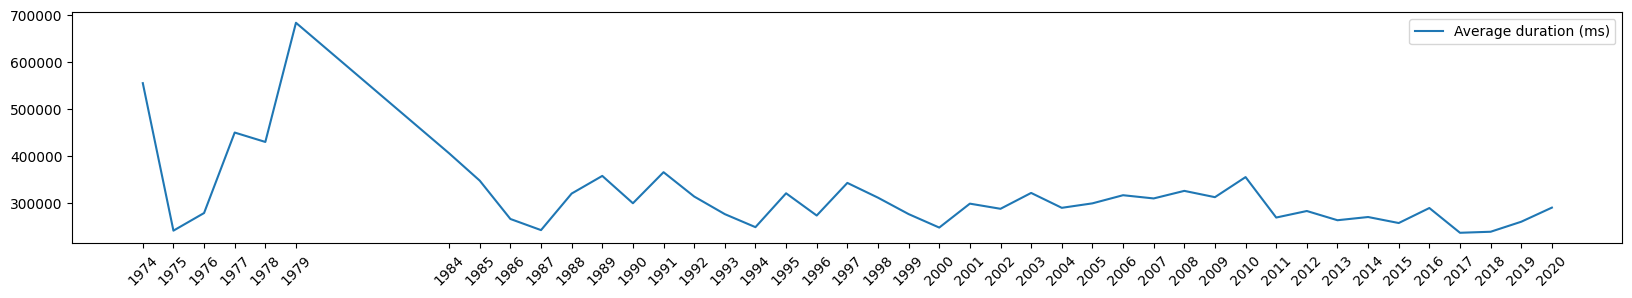

In [9]:
# To be completed
temp_df = spotify_df.groupby(
    by='album_release_year',
    as_index=False
).agg({'duration_ms': 'mean'}).sort_values(
    by='album_release_year',
    ascending=True
).iloc[1:]  # Remove 0 year!


fig = plt.figure(figsize=(20, 3))
plt.plot(
    temp_df['album_release_year'],
    temp_df['duration_ms'],
    label='Average duration (ms)'
)
plt.legend()
plt.xticks(temp_df['album_release_year'], rotation=45)
plt.show()

## Q: Plot average loudness of tracks by year

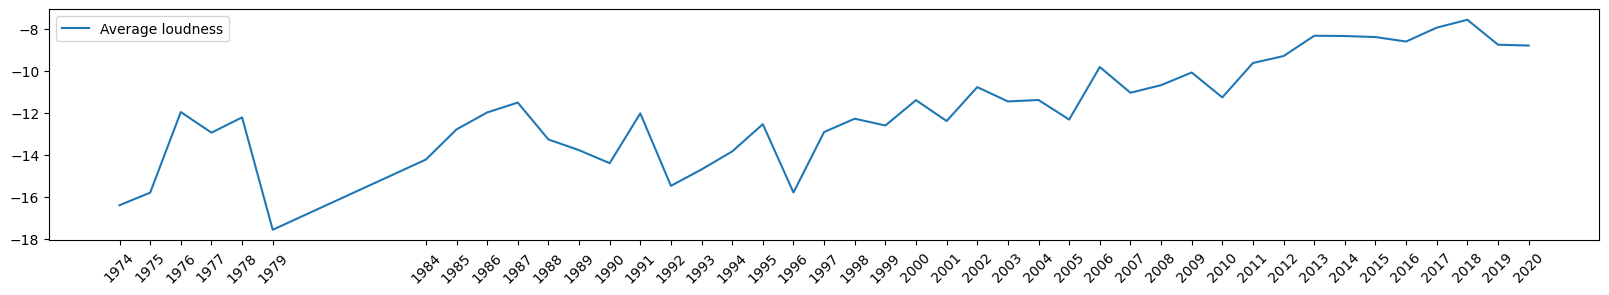

In [10]:
# To be completed
# To be completed
temp_df = spotify_df.groupby(
    by='album_release_year',
    as_index=False
).agg({'loudness': 'mean'}).sort_values(
    by='album_release_year',
    ascending=True
).iloc[1:]  # Remove 0 year!


fig = plt.figure(figsize=(20, 3))
plt.plot(
    temp_df['album_release_year'],
    temp_df['loudness'],
    label='Average loudness'
)
plt.legend()
plt.xticks(temp_df['album_release_year'], rotation=45)
plt.show()

## Q: Music attributes of songs over the years


<Axes: xlabel='album_release_year'>

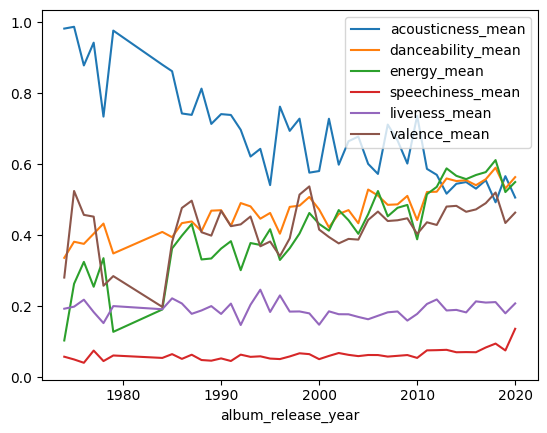

In [11]:
# the columns that we are interseted in
target_cols = ["acousticness","danceability","energy","speechiness","liveness","valence"]

# To be completed
spotify_df[target_cols + ['album_release_year']].groupby(
    by='album_release_year'
).mean().iloc[1:].rename(columns={k: k + '_mean' for k in target_cols}).plot()

## Q: Plot top 10 popular tracks (Bar Chart)

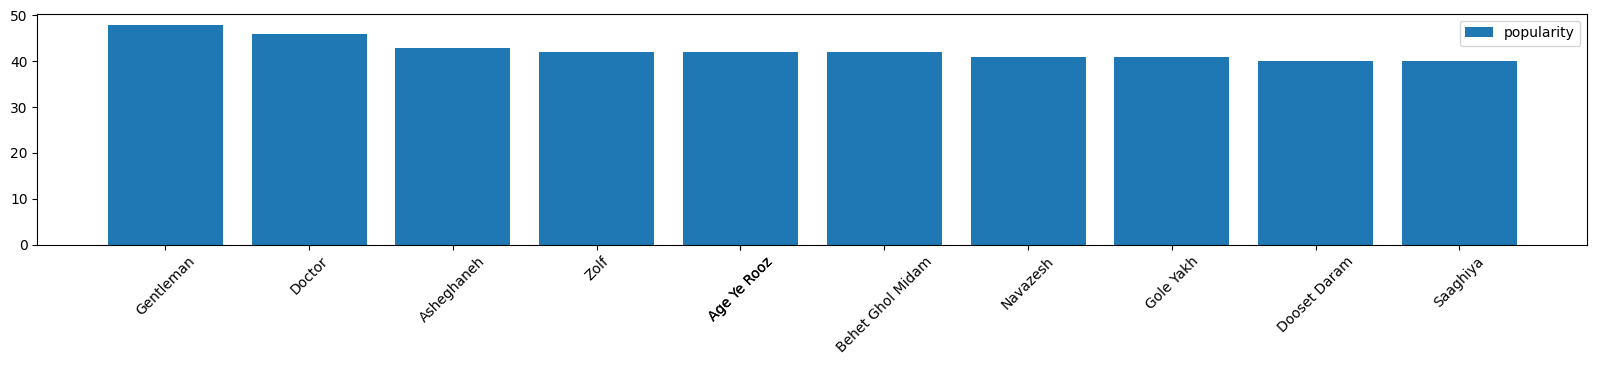

In [12]:
# To be completed
temp_df = spotify_df.sort_values(
    by='popularity',
    ascending=False
)[['track_name', 'popularity']].iloc[:11]

fig = plt.figure(figsize=(20, 3))
plt.bar(
    temp_df['track_name'],
    temp_df['popularity'],
    label='popularity'
)
plt.legend()
plt.xticks(temp_df['track_name'], rotation=45)
plt.show()

## Q: Plot top 10 popular artist (Bar Chart)

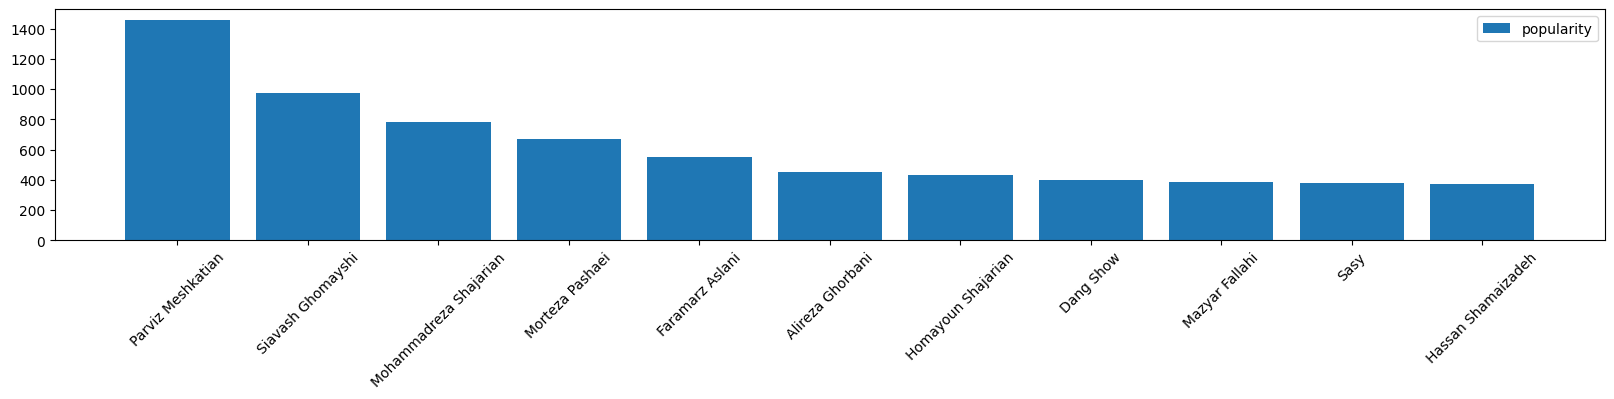

In [13]:
# To be completed
temp_df = spotify_df.groupby(
    by='artist_name',
    as_index=False
).sum().sort_values(
    by='popularity',
    ascending=False
)[['artist_name', 'popularity']].iloc[:11]

fig = plt.figure(figsize=(20, 3))
plt.bar(
    temp_df['artist_name'],
    temp_df['popularity'],
    label='popularity'
)
plt.legend()
plt.xticks(temp_df['artist_name'], rotation=45)
plt.show()

## Q: Plot correlation matrix's heatmap
What are the most correlated features with `duration_ms` and `popularity`?

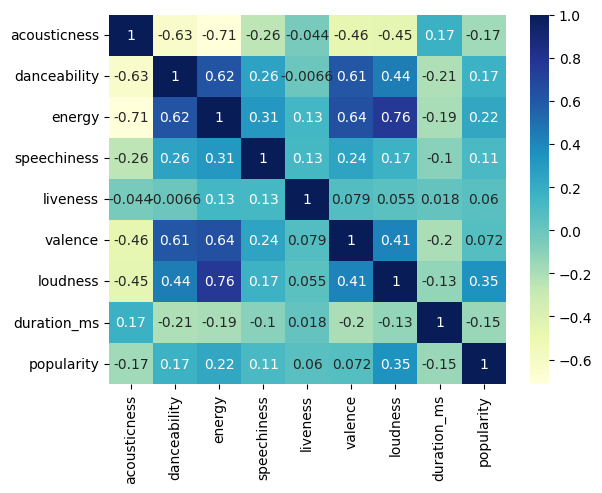

In [14]:
# To be completed
temp_df = spotify_df[["acousticness", "danceability", "energy", "speechiness", "liveness", "valence", "loudness", "duration_ms", "popularity"]].corr()
sns.heatmap(temp_df, cmap="YlGnBu", annot=True)
plt.show()

In [15]:
# To be completed
print(f"'duration_ms' is most correlated with 'energy' with {spotify_df['duration_ms'].corr(spotify_df['acousticness'])} correlation coefficient")
print(f"'popularity' is most correlated with 'energy' with {spotify_df['popularity'].corr(spotify_df['energy'])} correlation coefficient")

'duration_ms' is most correlated with 'energy' with 0.1707127970121686 correlation coefficient
'popularity' is most correlated with 'energy' with 0.2235152144827622 correlation coefficient


## Q: Plot box-plot for each feature 
Compare box-plot values of `energy` and `liveness`

<Axes: >

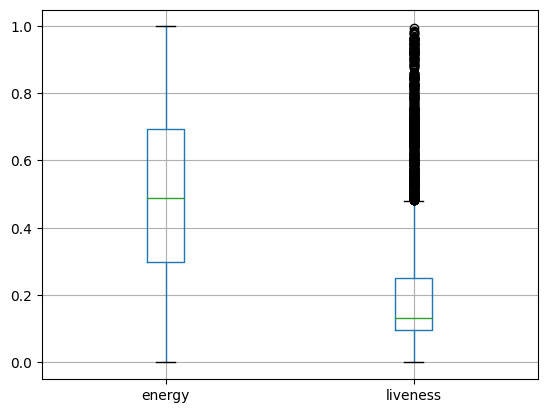

In [16]:
# To be completed
spotify_df.boxplot(column=['energy', 'liveness'])

## Q: Missing values 
How many `nan` values are there in each column?

In [17]:
# To be completed
pd.DataFrame(spotify_df.isna().sum(), columns=['nan_count'])

,nan_count
track_id,0
disc_number,0
duration_ms,0
explicit,0
track_name,0
track_name_farsi,10020
artist_name,0
artist_name_farsi,0
popularity,9701
track_number,0


# Handling nan values of dataframe
- Fill categorical features with "None"
- Fill numerical features with appropriate approach(mean, median or any imputation). Explain your choice.

In [18]:
# To be completed
categorical_cols = spotify_df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.extend(['explicit', 'mode'])     # Technically a boolean column is categorical too!
spotify_df[categorical_cols] = spotify_df[categorical_cols].fillna('None')

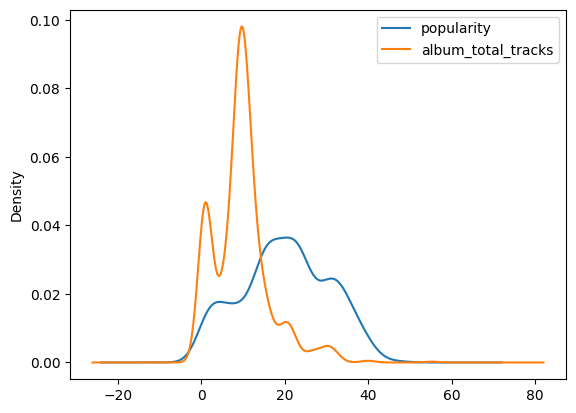

In [19]:
# To be completed
numerical_cols = spotify_df.select_dtypes(exclude=['object']).columns.tolist()
numerical_cols.remove('explicit')       # Technically a boolean column is NOT numerical!
numerical_cols.remove('mode')           # Technically a boolean column is NOT numerical!

"""
    STEP 0:
        Let's check definitions first:
            - Mean-It is preferred if data is numeric and not skewed.
            - Median-It is preferred if data is numeric and skewed.
            - Mode-It is preferred if the data is a string(object) or numeric.
    STEP 1:
        Quick review of NaN columns for the numerical columns (using `spotify_df[numerical_cols].isna().sum()`) I noticed two columns
        'popularity' and 'album_total_track' are the only ones with missing values. So we only need to check two columns. Yey!
    STEP 2:
        Now I plot the distribution of the both columns to see the pattern of the data (using `spotify_df['popularity'].plot.kde()`)
            - popularity: It's pretty much a normal distribution
            - album_total_tracks: It's a bit skewed to the right
    STEP 3:
        I decided to fill the missing values for 'popularity' with the mean of the column.
"""

# Which columns contain NaN?
spotify_df[numerical_cols].isna().sum()

# Plot distributions
spotify_df['popularity'].plot.kde(label='popularity')
spotify_df['album_total_tracks'].plot.kde(label='album_total_tracks')
plt.legend()
plt.show()

# Imputation
spotify_df['popularity'].fillna(spotify_df['popularity'].mean(), inplace=True)  # With mean
spotify_df['album_total_tracks'].fillna(spotify_df['album_total_tracks'].mean(), inplace=True)  # With median

# Determine your desired features here

In [20]:
music_feature_cols = [
    'acousticness',
    'danceability',
    'energy',
    'instrumentalness',
    'liveness',
    'loudness',
    'speechiness',
    'valence',
    'tempo',
    'duration_ms',
    'popularity',
    'album_release_year',
]

In [21]:
tracks_feature_df = spotify_df[music_feature_cols + ['artist_name']].dropna()
tracks_feature_df

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,duration_ms,popularity,album_release_year,artist_name
0,0.839,0.437,0.390,0.000035,0.1360,-7.170,0.0299,0.3300,131.913,446880,20.113856,2020,Salar Aghili
1,0.970,0.379,0.146,0.000360,0.0812,-10.008,0.0414,0.3460,105.634,851920,20.113856,2020,Salar Aghili
2,0.664,0.437,0.453,0.002070,0.1100,-5.392,0.0349,0.5010,94.651,293160,20.113856,2020,Salar Aghili
3,0.915,0.488,0.138,0.006580,0.2120,-12.287,0.0451,0.4450,110.967,648720,20.113856,2020,Salar Aghili
4,0.657,0.301,0.443,0.000008,0.1200,-5.702,0.0334,0.4100,148.053,273480,20.113856,2020,Salar Aghili
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10627,0.946,0.356,0.499,0.005460,0.3530,-10.805,0.0452,0.3960,146.591,397505,20.113856,1985,Shahram Nazeri
10628,0.982,0.318,0.163,0.061400,0.6670,-17.538,0.0690,0.1610,72.379,3522173,20.113856,2008,Shahram Nazeri
10629,0.883,0.213,0.218,0.019400,0.2630,-15.865,0.0350,0.1390,86.645,3402706,20.113856,2008,Shahram Nazeri
10630,0.842,0.242,0.304,0.223000,0.7980,-13.286,0.0369,0.2100,77.819,3342733,20.113856,2008,Shahram Nazeri


## Feature Preprocessing
In this section, you should preprocess desired features to get suitable for using in machine learning models. 

In [22]:
# Numeric 
for col in [
    'acousticness',
    'danceability',
    'energy',
    'instrumentalness',
    'liveness',
    'loudness',
    'speechiness',
    'valence',
    'tempo',
    'duration_ms',
    'album_release_year',
]:
    tracks_feature_df[[col]] = MinMaxScaler().fit_transform(tracks_feature_df[[col]])

# Categorical features
# le = LabelEncoder()
# tracks_feature_df['artist_name_le'] = LabelEncoder().fit_transform(tracks_feature_df['artist_name'])
# tracks_feature_df[['artist_name_le']] = MinMaxScaler().fit_transform(tracks_feature_df[['artist_name_le']])
tracks_feature_df = tracks_feature_df.join(pd.get_dummies(tracks_feature_df['artist_name']))

## Visualize Dataset Features using Dimension Reduction models (e.g. PCA)

(10632, 2)


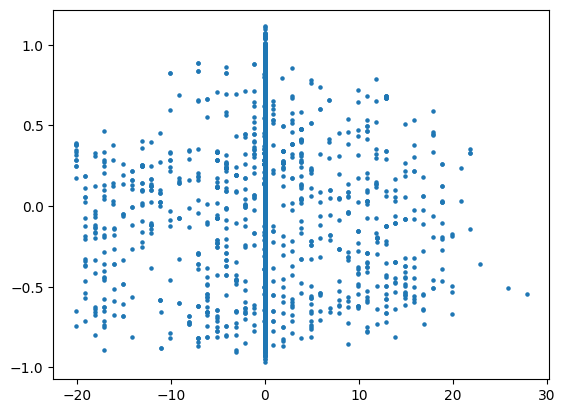

In [23]:
pca = PCA(n_components=2)
tracks_feature_visual = pca.fit_transform(tracks_feature_df.drop(['artist_name'], axis=1))
print(tracks_feature_visual.shape)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 1], s=5)
plt.show()

(10632, 3)


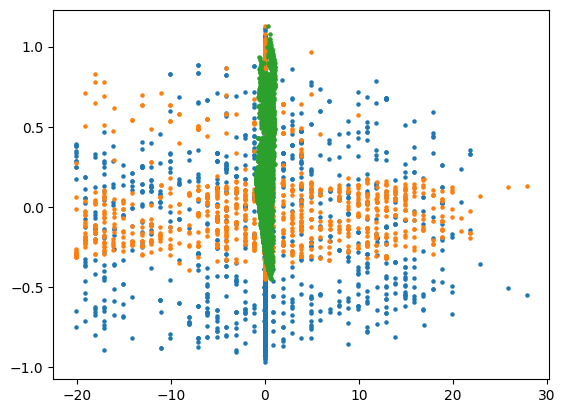

In [24]:
pca = PCA(n_components=3)
tracks_feature_visual = pca.fit_transform(tracks_feature_df.drop(['artist_name'], axis=1))
print(tracks_feature_visual.shape)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 1], s=5)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 2], s=5)
plt.scatter(tracks_feature_visual[:, 1], tracks_feature_visual[:, 2], s=5)
plt.show()

## Regression

In [25]:
# Set random seed to make results reproducible 
RANDOM_SEED = 42

In [26]:
df = tracks_feature_df
regression_features = [
    'acousticness',
    'danceability',
    'energy',
    'instrumentalness',
    'liveness',
    'loudness',
    'speechiness',
    'valence',
    'tempo',
    'duration_ms',
    'album_release_year',
    'artist_name_le',
]
regression_features = list(tracks_feature_df.columns)
regression_features.remove('popularity')
all_artists = tracks_feature_df['artist_name'].unique().tolist()
regression_features.remove('artist_name')
x=df.loc[:, regression_features].values
y=df.loc[:,'popularity'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=RANDOM_SEED)

In this section, you should use `LinearRegression` class in scikit-learn library to implement regression algorithm. note that you should pass suitable parameters to get better results.

In [27]:
clf = GridSearchCV(
    estimator=LinearRegression(),
    param_grid={'fit_intercept': [True, False], 'positive': [True, False], }
).fit(x_train, y_train)
clf.best_params_

{'fit_intercept': False, 'positive': True}

In [28]:
regressor = LinearRegression(
    fit_intercept=True,
    positive=False
)
regressor.fit(x_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

-2497001626018.1953
[ 1.44665882e-01  4.63258781e-01 -1.01560392e+00  1.58060223e-01
 -3.05018056e-01  2.22419372e+00  8.51089215e-01  1.28523549e-01
 -2.09015280e-01 -7.40051517e-01 -1.09104607e+00  2.49700163e+12
  2.49700163e+12  2.49700163e+12  2.49700163e+12  2.49700163e+12
  2.49700163e+12  2.49700163e+12  2.49700163e+12  2.49700163e+12
  2.49700163e+12  2.49700163e+12  2.49700163e+12  2.49700163e+12
  2.49700163e+12  2.49700163e+12  2.49700163e+12  2.49700163e+12
  2.49700163e+12  2.49700163e+12  2.49700163e+12  2.49700163e+12
  2.49700163e+12  2.49700163e+12  2.49700163e+12  2.49700163e+12
  2.49700163e+12  2.49700163e+12  2.49700163e+12  2.49700163e+12
  2.49700163e+12  2.49700163e+12  2.49700163e+12  2.49700163e+12
  2.49700163e+12  2.49700163e+12  2.49700163e+12  2.49700163e+12
  2.49700163e+12  2.49700163e+12  2.49700163e+12  2.49700163e+12
  2.49700163e+12  2.49700163e+12  2.49700163e+12  2.49700163e+12
  2.49700163e+12  2.49700163e+12  2.49700163e+12  2.49700163e+12
  2.4

## Evaluate Regression Algorithm

In [29]:
y_pred = regressor.predict(x_test)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_output

,Actual,Predicted
0,13.000000,20.005371
1,20.113856,21.016113
2,20.113856,21.346680
3,20.113856,20.287598
4,20.113856,20.089355
...,...,...
3185,20.113856,20.718262
3186,12.000000,19.198730
3187,20.113856,20.013672
3188,20.113856,20.299316


In [30]:
#autograde
#Checking the accuracy of Linear Regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.1656844169865093
Mean Squared Error: 7.206469362838845
Root Mean Squared Error: 2.6844867969201944


# Classification

## Prepare Labels

In [31]:
sonnati_artists = ['Salar Aghili', 'Mohammadreza Shajarian', 'Hesameddin Seraj',
       'Mohammad Esfahani', 'Abdolhosein Mokhtabad', 'Hossein Alizadeh', 
       'Kayhan Kalhor', 'Alireza Eftekhari', 'Iraj Bastami', 'Alireza Ghorbani', 
       'Parviz Meshkatian', 'Mohammad Reza Lotfi', 'Ali Zand Vakili', 'Kaveh Deylami', 
       'Hatam Asgari', 'Homayoun Shajarian', 'Shahram Nazeri']

## Add `is_sonnati` feature column 
Using `sonnati_artist` list, add new feature column `is_sonnati` that determines a song whether a song is sonnati

In [32]:
# To be completed
tracks_feature_df['is_sonnati'] = tracks_feature_df['artist_name'].apply(lambda x: x in sonnati_artists)

## Create Classification Dataset

In [33]:
x = tracks_feature_df.reset_index().drop(columns=['is_sonnati', 'artist_name', 'popularity'] + all_artists).values
y = tracks_feature_df['is_sonnati'].values

In [34]:
print(f'{x.shape=}')
print(f'{y.shape=}')

x.shape=(10632, 12)
y.shape=(10632,)


In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=RANDOM_SEED, shuffle=True)

## Choose a Model and Report the Evaluation Metrics

`fit_and_eval` function takes two parameters:
- scikit-learn classification model
- dataset object (that is a tuple of `x` and `y`) 


you should just instantiate your model and pass your desired parameters and then get the result of testing over test part of dataset.

In [36]:
#autograde
def fit_and_eval(model, dataset):
    """
    Train scikit-learn model on given dataset
    
    model: scikit-learn model
    dataset: tuple of x's and y's (whole data without any split)
    
    return:
        dict: evaluation metrics report
    """
    eval_metrics = {}
    x, y = dataset
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.3, random_state=RANDOM_SEED, shuffle=True
    )
    
    # train model
    classifier = make_pipeline(StandardScaler(), model)
    
    # ignore index column for training and inferencing
    classifier.fit(x_train[:, 1:], y_train)
    y_pred = classifier.predict(x_test[:, 1:])
    
    # export predictions to submit to kaggle
    pd.DataFrame({'id': x_test[:, 0].astype(int), 'predicted': y_pred}, dtype=str).to_csv('spotify_pred.csv', index=False)
    
    # evaluate model
    eval_metrics['acc'] = accuracy_score(y_test, y_pred)
    eval_metrics['precision'] = precision_score(y_test, y_pred)
    eval_metrics['recall'] = recall_score(y_test, y_pred)
    eval_metrics['f1'] = f1_score(y_test, y_pred)
    eval_metrics['confusion'] = confusion_matrix(y_test, y_pred)
    return eval_metrics

In [37]:
# here is an example
dataset = (x, y)
print(fit_and_eval(KNeighborsClassifier(n_neighbors=1), dataset))

{'acc': 0.831974921630094, 'precision': 0.7571297148114076, 'recall': 0.7515981735159817, 'f1': 0.7543538038496791, 'confusion': array([[1831,  264],
       [ 272,  823]], dtype=int64)}


In [38]:
# Random Forest (F1 ~ 80) - Good
dataset = (x, y)
print("Random Forest:", fit_and_eval(RandomForestClassifier(), dataset))

# XGBoost (F1 ~ 85) - Best
dataset = (x, y)
print("XGBoost:", fit_and_eval(XGBClassifier(), dataset))

Random Forest: {'acc': 0.8824451410658307, 'precision': 0.8290676416819013, 'recall': 0.828310502283105, 'f1': 0.8286888990406578, 'confusion': array([[1908,  187],
       [ 188,  907]], dtype=int64)}
XGBoost: {'acc': 0.8843260188087775, 'precision': 0.8282097649186256, 'recall': 0.8365296803652968, 'f1': 0.8323489323034983, 'confusion': array([[1905,  190],
       [ 179,  916]], dtype=int64)}


In [39]:
# Let's tune the Hyperparameters of XGBoost

# # Tune XGBoost with GridSearch
# dataset = (x, y)
# xgb = XGBClassifier()
# parameters = {
#     'n_estimators': [100, 200, 300, 400],
#     'max_depth': [7, 8, 9, 10, 11, 12],
#     'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25],
#     'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
#     'colsample_bytree': [0.3, 0.4, 0.5]
# }
# clf = GridSearchCV(xgb, parameters, n_jobs=-1, cv=5, scoring='f1')
# clf.fit(x_train, y_train)
# print(clf.best_params_)

In [40]:
#autograde
# the best model you want to be evaluated. Just pass do the same way as above cell

# Random Forest Classifier
dataset = (x, y)
print(fit_and_eval(XGBClassifier(n_estimators=300, max_depth=8, learning_rate=0.25, gamma=0.2, colsample_bytree=0.5), dataset))

{'acc': 0.8912225705329153, 'precision': 0.8375451263537906, 'recall': 0.8474885844748858, 'f1': 0.8424875170222423, 'confusion': array([[1915,  180],
       [ 167,  928]], dtype=int64)}
